In [7]:
import pandas as pd

import numpy as np


In [8]:
df= pd.read_csv("/content/TechBlitz DataScience Dataset.csv")

In [9]:
len(df.isnull())

5000

In [10]:
print(df.isnull().sum())  # Check for missing values


Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [11]:
df.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [12]:
air_quality_mapping = {"Good": 0, "Moderate": 1, "Poor": 2, "Hazardous": 3}
df["Air Quality"] = df["Air Quality"].map(air_quality_mapping)

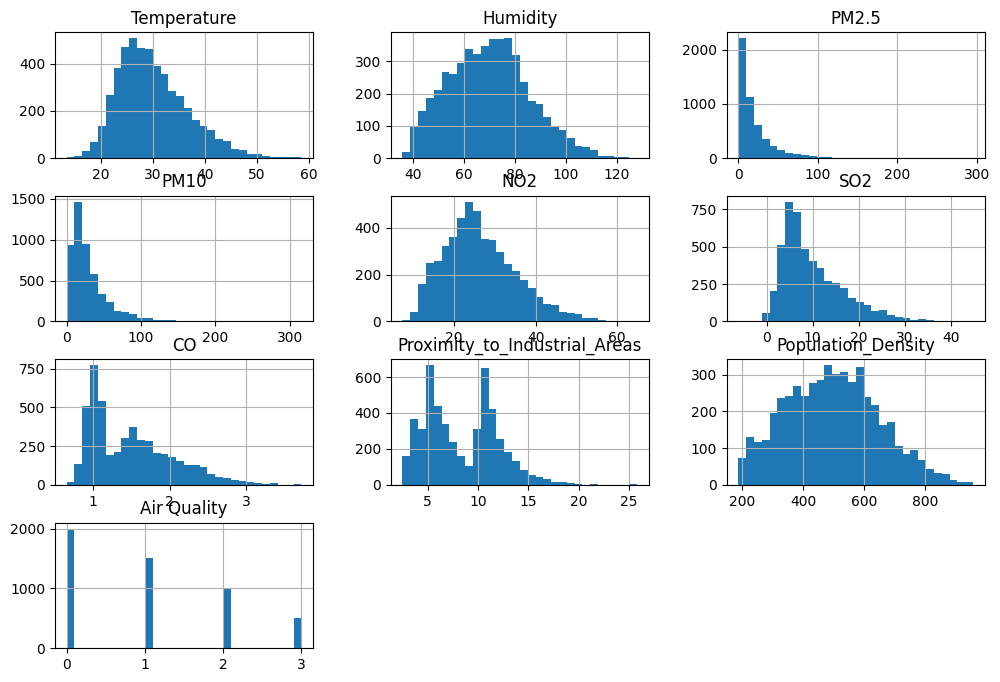

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram for each feature
df.hist(figsize=(12, 8), bins=30)
plt.show()


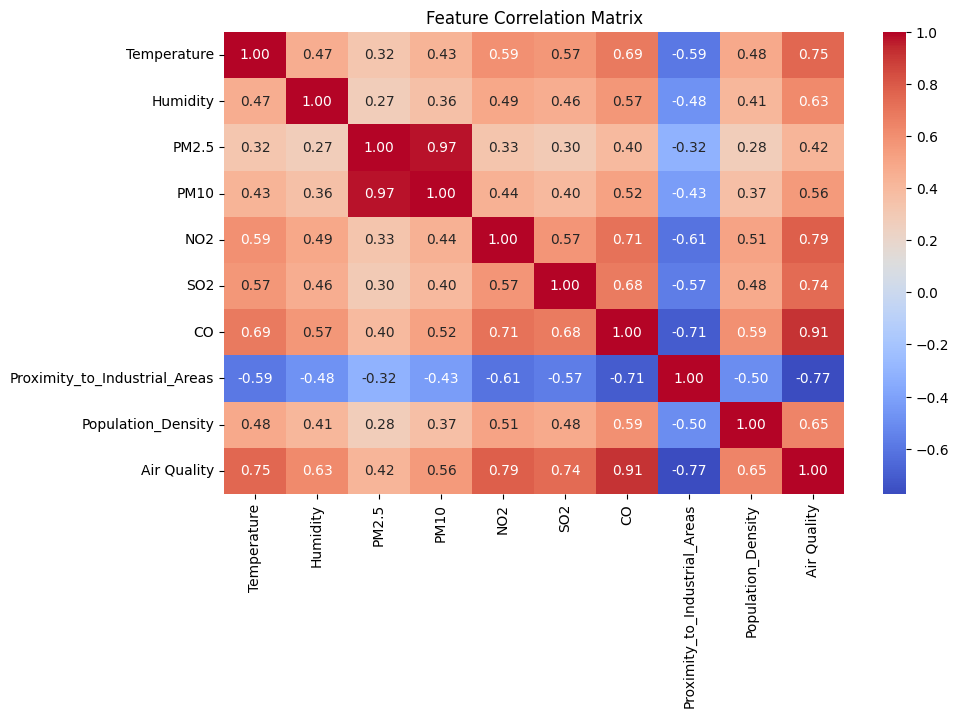

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


In [15]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Air Quality"])  # Features
y = df["Air Quality"]  # Target variable

# Split into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
X

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303
...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize and train model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       409
           1       0.97      0.97      0.97       294
           2       0.88      0.90      0.89       186
           3       0.92      0.88      0.90       111

    accuracy                           0.96      1000
   macro avg       0.94      0.94      0.94      1000
weighted avg       0.96      0.96      0.96      1000

[[409   0   0   0]
 [  0 285   9   0]
 [  0  10 168   8]
 [  0   0  13  98]]


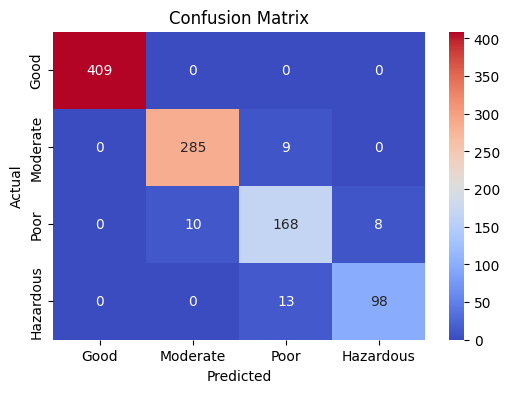

In [34]:
# ✅ Compute Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# ✅ Plot Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", xticklabels=air_quality_mapping.keys(), yticklabels=air_quality_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


<ipython-input-18-10a00f41f1e2>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette="viridis")


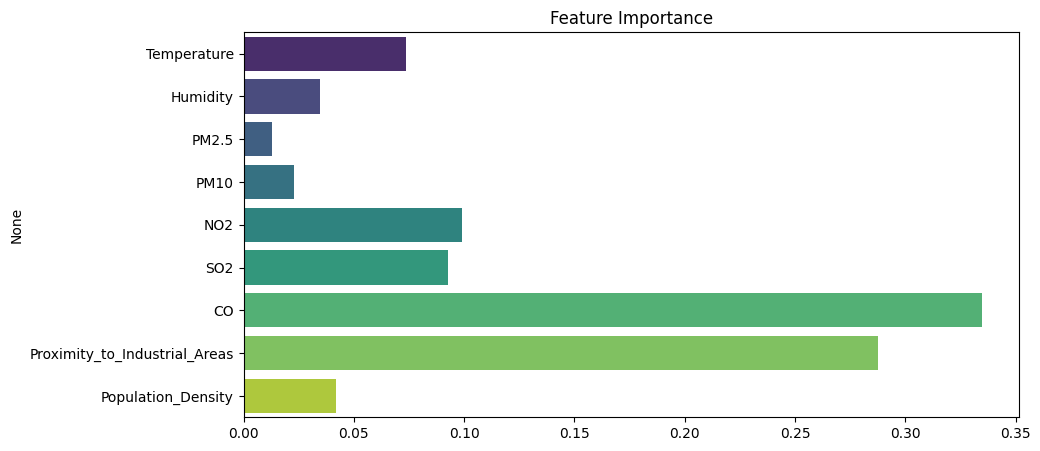

In [18]:
importances = clf.feature_importances_
features = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance")
plt.show()


In [21]:
y.value_counts()

,count
Air Quality,
0,2000
1,1500
2,1000
3,500


In [25]:
len(df.query('`Air Quality`==0'))

2000

In [26]:
len(df.query('`Air Quality`==1'))

1500

In [27]:
len(df.query('`Air Quality`==2'))

1000

In [28]:
len(df.query('`Air Quality`==3'))

500

In [29]:
a = df.query('`Air Quality`==0')

In [30]:
a

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,0
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,0
10,26.3,65.7,1.3,5.5,18.3,5.9,0.85,13.0,529,0
12,20.0,53.3,3.7,12.9,26.1,6.6,1.09,10.2,538,0
13,28.6,53.7,28.9,34.0,23.2,4.5,1.02,11.0,508,0
...,...,...,...,...,...,...,...,...,...,...
4987,26.2,63.4,14.7,21.1,19.1,3.7,1.15,14.2,305,0
4988,26.5,43.0,18.8,18.4,17.6,2.1,1.08,10.6,426,0
4992,29.8,56.7,6.8,14.0,23.0,4.5,1.10,11.4,567,0
4994,31.1,61.0,27.1,31.1,13.0,3.8,0.98,13.4,278,0


In [24]:
df["Proximity_to_Industrial_Areas"]

,Proximity_to_Industrial_Areas
0,6.3
1,6.0
2,5.2
3,11.1
4,12.7
...,...
4995,2.8
4996,5.7
4997,9.6
4998,11.6


In [31]:
b = df.query('`Air Quality`==1')
b

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,1
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,1
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,1
7,31.0,59.6,5.0,16.8,24.2,13.6,1.38,6.3,443,1
11,32.5,51.2,1.6,10.5,21.6,19.3,1.53,5.9,519,1
...,...,...,...,...,...,...,...,...,...,...
4991,31.8,80.2,22.4,34.1,29.7,4.9,1.22,9.4,580,1
4993,34.9,77.7,32.3,47.1,17.4,11.5,1.63,8.8,541,1
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,1
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,1


In [32]:
c = df.query('`Air Quality`==2')
c

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
6,41.7,82.5,1.7,15.8,31.1,12.7,1.80,4.6,735,2
8,29.4,93.8,10.3,22.7,45.1,11.8,2.03,5.4,486,2
9,33.2,80.5,11.1,24.4,32.0,15.3,1.69,4.9,535,2
17,37.6,81.2,28.1,56.6,46.7,13.7,1.85,4.1,560,2
19,37.8,97.2,0.6,24.6,37.1,11.7,1.13,7.7,803,2
...,...,...,...,...,...,...,...,...,...,...
4971,26.1,82.7,19.9,37.5,36.7,12.0,1.50,4.3,706,2
4973,30.8,60.9,0.5,20.6,36.1,11.2,2.13,4.0,627,2
4975,32.5,72.1,26.5,42.4,35.3,2.0,1.94,5.6,510,2
4976,34.6,97.6,52.6,69.2,33.1,11.4,2.20,4.6,537,2


In [33]:
d = df.query('`Air Quality`==3')
d

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
5,39.4,96.6,14.6,35.5,42.9,17.9,1.82,3.1,674,3
29,52.5,83.9,67.5,91.2,31.6,34.6,2.31,2.9,785,3
30,44.7,97.9,34.6,57.3,28.1,22.6,1.78,3.5,562,3
39,33.3,70.1,55.1,72.7,40.5,30.7,2.12,4.9,612,3
40,37.5,83.7,3.1,2.2,39.5,29.2,2.61,2.5,898,3
...,...,...,...,...,...,...,...,...,...,...
4981,41.5,94.0,62.1,79.4,30.0,20.0,2.80,7.8,547,3
4986,35.6,103.8,74.5,93.3,31.8,23.6,2.04,20.8,757,3
4989,44.4,102.1,35.4,54.7,55.5,25.5,1.79,3.0,772,3
4990,46.8,93.8,11.8,25.4,33.8,28.7,3.27,3.7,589,3


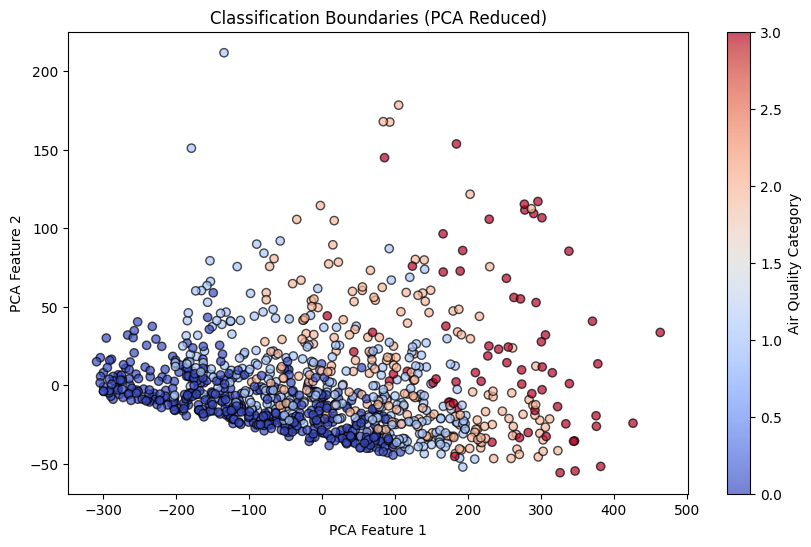

In [35]:
import numpy as np
from sklearn.decomposition import PCA

# ✅ Reduce Features to 2D for Visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# ✅ Train Model Again with 2D Data
clf_pca = RandomForestClassifier(n_estimators=100, random_state=42)
clf_pca.fit(X_train_pca, y_train)

# ✅ Predict Again
y_pred_pca = clf_pca.predict(X_test_pca)

# ✅ Scatter Plot
plt.figure(figsize=(10,6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_pred_pca, cmap="coolwarm", edgecolor="k", alpha=0.7)
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.title("Classification Boundaries (PCA Reduced)")
plt.colorbar(label="Air Quality Category")
plt.show()


In [39]:
# User Input for Air Quality Prediction
temp = float(input("Enter Temperature (°C): "))
humidity = float(input("Enter Humidity (%): "))
pm25 = float(input("Enter PM2.5 Concentration (µg/m³): "))
pm10 = float(input("Enter PM10 Concentration (µg/m³): "))
no2 = float(input("Enter NO2 Concentration (ppb): "))
so2 = float(input("Enter SO2 Concentration (ppb): "))
co = float(input("Enter CO Concentration (ppm): "))
proximity = float(input("Enter Proximity to Industrial Areas (km): "))
population_density = int(input("Enter Population Density (people/km²): "))

# Convert input into a dataframe
user_data = pd.DataFrame([[temp, humidity, pm25, pm10, no2, so2, co, proximity, population_density]],
                         columns=X.columns)

# Predict Air Quality
prediction = clf.predict(user_data)
print(f"📌 Predicted Air Quality: {prediction[0]}")


# Mapping numerical outputs to categorical labels
label_mapping = {
    0: "Good",
    1: "Moderate",
    2: "Poor",
    3: "Hazardous"
}

# Predict the numerical output
numerical_prediction = clf.predict(user_data)[0]  # Suppose model returns 2

# Convert to categorical label
categorical_prediction = label_mapping[numerical_prediction]

print(f"📌 Predicted Air Quality: {categorical_prediction}")


Enter Temperature (°C): 31
Enter Humidity (%): 59.6
Enter PM2.5 Concentration (µg/m³): 5
Enter PM10 Concentration (µg/m³): 16.8
Enter NO2 Concentration (ppb): 24.2
Enter SO2 Concentration (ppb): 13.6
Enter CO Concentration (ppm): 1.38
Enter Proximity to Industrial Areas (km): 6.3
Enter Population Density (people/km²): 443
📌 Predicted Air Quality: 1
📌 Predicted Air Quality: Moderate


ERROR: Could not find a version that satisfies the requirement pkl (from versions: none)
ERROR: No matching distribution found for pkl


In [44]:
# Save the trained model
import pickle
with open("air_quality_model.pkl", "wb") as f:
    pickle.dump(clf, f)
